## Problem Statement

One of the organizations looking to segregate the individual based on the income range so that they can leverage the information for their business needs. In this case study, we need to classify if the individual belongs to a salary range of >50K or <=50K. We need to work on the decision tree algorithm and perform the below tasks. 

**Data Dictionary**

**Age** - Age of the individual

**Workclass** - Work class of the individual

**Fnlwgt** - The continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents	

**Education** -	Education of the individual

**Education_Num** -	Education number of the individual

**MaritalStatus** -	Marital status of the individual

**Occupation** - Occupation of an individual

**Relationship** -	Relationship of an individual

**Race** -	Race of an individual

**Gender** - Gender of an individual

**Capital_Gain** - Capital_Gain of an individual

**Capital_Loss** -	Capital_Loss of an individual

**HoursPerWeek** -	HoursPerWeek individual works

**NativeCountry** -	NativeCountry of an individual

**Outcome** - Class of an individual

# Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Understand the Data](#read)**
    - 2.2 - **[Exploratory Data Analysis](#eda)**
    - 2.3 - **[Missing Value Treatment](#null)**
    - 2.4 - **[Encoding and Feature Scaling](#enc)**
    - 2.5 - **[Feature Scaling](#fs)**
3. **[What is Decision Tree](#lr)**
    - 3.1 - **[Understanding the concept of Entropy and Gini](#gi)**
    - 3.2 - **[How to calculate the information gain](#mf)**
    - 3.3 - **[How the tree gets build with an example](#sf)**
    - 3.4 - **[How the depth of the tree will impact the model (Overfitting and Underfitting) ](#wknn)**
4. **[Splitting the data into Train and Test](#sd)**
5. **[Creating the model on training dataset](#model)**
6. **[Run the model on the Test Dataset](#test)**
7. **[Check the accuracy of the model](#acc)**
    - 7.1 - **[Accuracy Score](#accscore)**
    - 7.2 - **[Confusion Matrix](#cm)**
    - 7.3 - **[ROC Curve](#roc)**
    - 7.4 - **[F1 Score](#f1score)**
    - 7.5 - **[Log Loss](#logloss)**
8. **[Comparing the Training and Testing Accuracies](#overunder)**
9. **[Applying Grid Search Cross Validation to find the best value of depth](#kfcv)**

<a id="lib"></a>
# 1. Import Libraries

In [2]:
#Importing the libraries which will be helpful for the data analysis. 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os 

<a id="prep"></a>
# 2. Data Preparation

In [4]:
#Importing the dataset which we will use for the modelling 
os.chdir(r'C:\Users\rahul\OneDrive\Desktop\Desktop\Case Studies - KWH\Case Study - Decision Tree')
dataset = pd.read_csv('Cencus_Income.csv')

<a id="read"></a>
# 2.1. Understand the Data

In [5]:
#Here are the few commands which will help us to understand the basic data 
#The info command will help us to understand the different columns present in the dataset and its datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            5268 non-null   int64 
 1   Fnlwgt         5268 non-null   int64 
 2   Education      5268 non-null   object
 3   Education_Num  5268 non-null   int64 
 4   MaritalStatus  5268 non-null   object
 5   Occupation     5268 non-null   object
 6   Relationship   5268 non-null   object
 7   Race           5268 non-null   object
 8   Gender         5268 non-null   object
 9   Capital_Gain   5268 non-null   int64 
 10  Capital_Loss   5268 non-null   int64 
 11  HoursPerWeek   5268 non-null   int64 
 12  NativeCountry  5268 non-null   object
 13  Outcome        5268 non-null   object
dtypes: int64(6), object(8)
memory usage: 576.3+ KB


In [6]:
#Len command will help us understand the total number of records present in the dataset
len(dataset)

5268

In [7]:
#.columns command will help us understand the columns present in the dataset
dataset.columns

Index(['Age', 'Fnlwgt', 'Education', 'Education_Num', 'MaritalStatus',
       'Occupation', 'Relationship', 'Race', 'Gender', 'Capital_Gain',
       'Capital_Loss', 'HoursPerWeek', 'NativeCountry', 'Outcome'],
      dtype='object')

In [8]:
dataset

,Age,Fnlwgt,Education,Education_Num,MaritalStatus,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,HoursPerWeek,NativeCountry,Outcome
0,42,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
1,37,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
2,49,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
3,41,147372,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,48,United-States,<=50K
4,36,155537,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,41,160785,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K
5264,29,335015,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,48,United-States,<=50K
5265,51,82720,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
5266,48,285570,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [9]:
#The below command will help us understand the total number of columns present in the dataset
len(dataset.columns)

14

<a id="eda"></a>
# 2.2. Exploratory Data Analysis

<Figure size 1500x200 with 0 Axes>

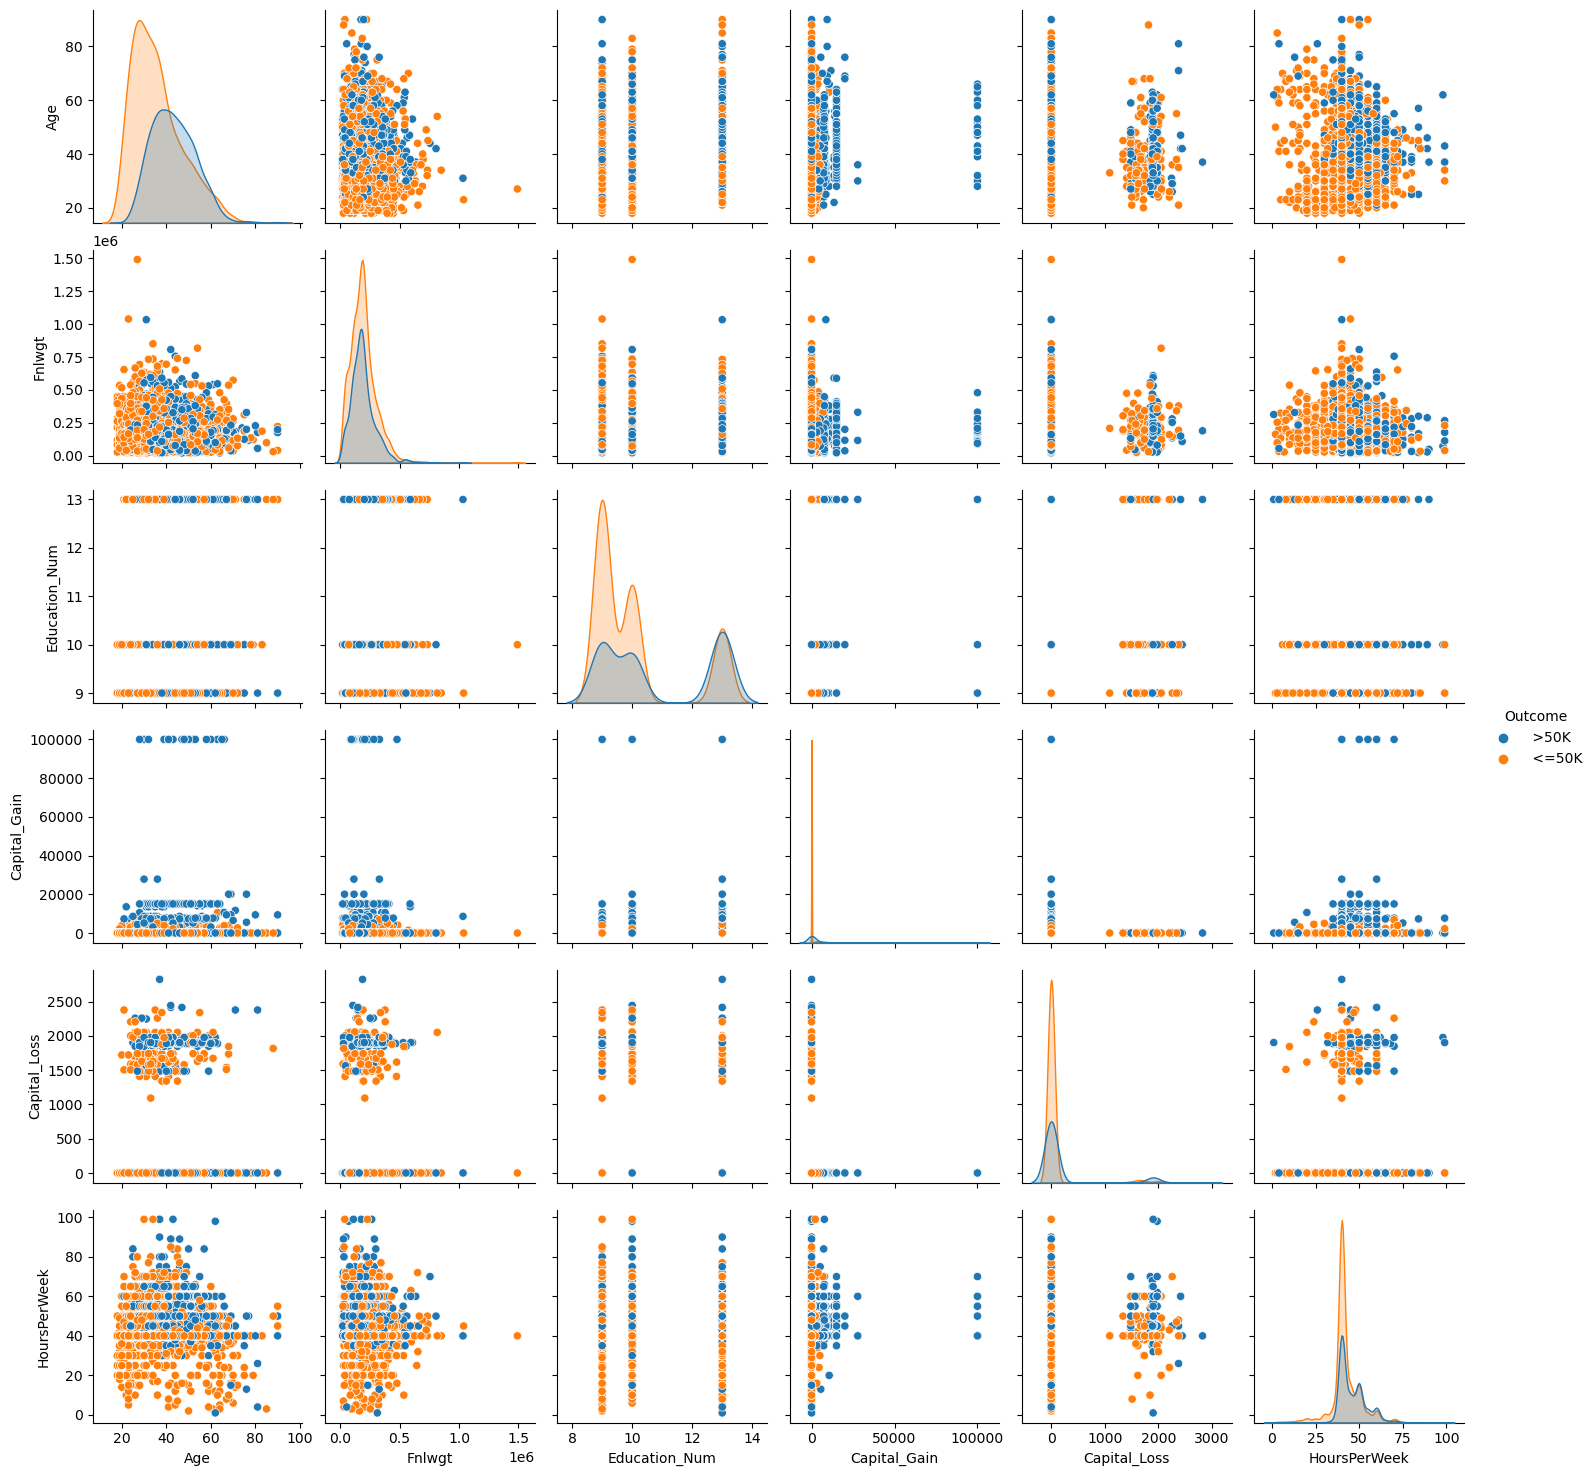

In [10]:
plt.figure(figsize=(15,2))
sns.pairplot(dataset[['Age','Fnlwgt', 'Education_Num','Capital_Gain', 'Capital_Loss', 'HoursPerWeek','Outcome']],hue='Outcome')
plt.show()

**From the above chart there is no significant outcome which can tell us that numerical variables are important for predicting the class**

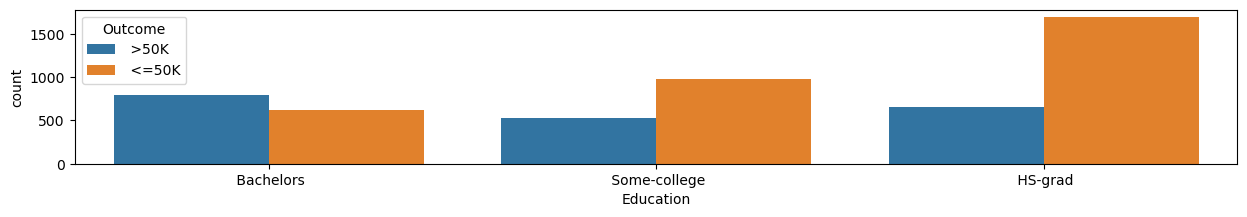

In [11]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'Education',hue='Outcome')
plt.show()

**People from HS-Grad and Some-College are having more in number with vlue as <=50 and people with masters are having outcome as >50**

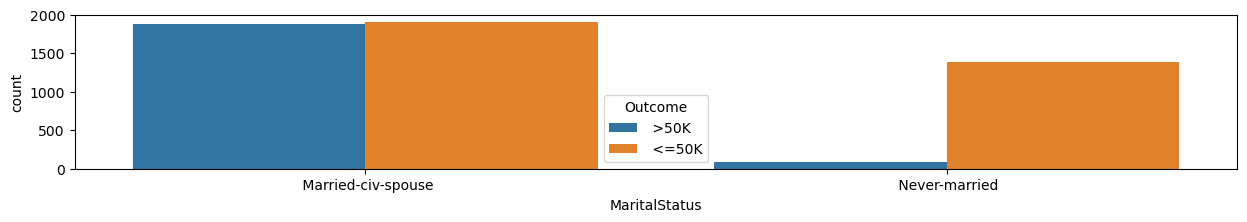

In [12]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'MaritalStatus',hue='Outcome')
plt.show()

**Never married people are having more number of population with <=50**

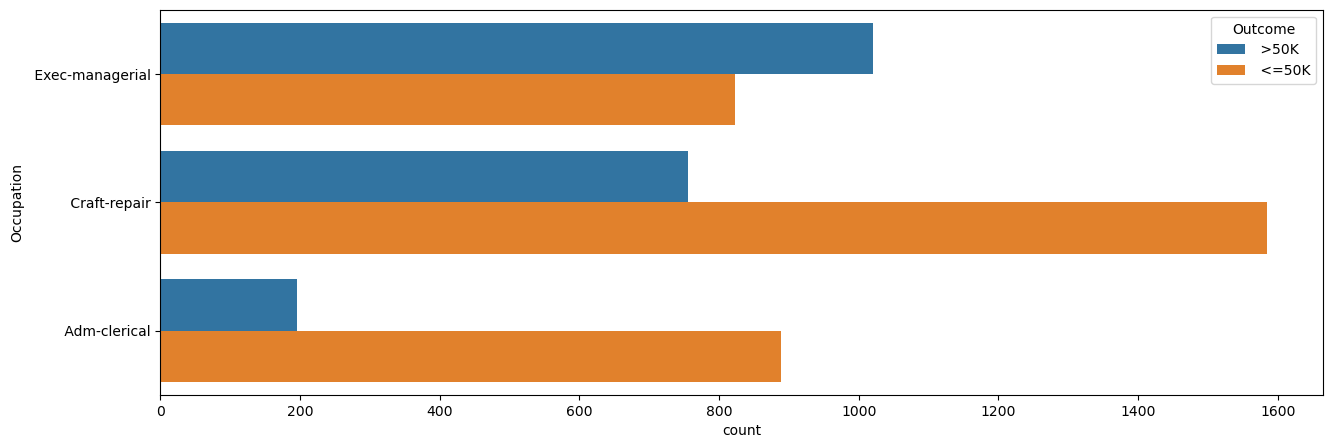

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(data=dataset, y = 'Occupation',hue='Outcome')
plt.show()

**People with occupation as Craft Repair are having more population with <=50K and Adm-Clerical with more number of >50**

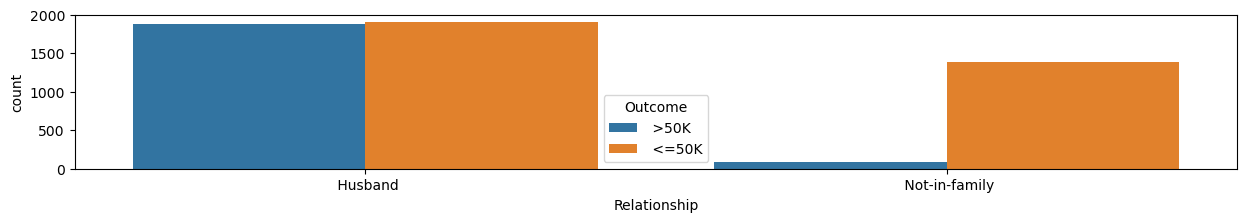

In [14]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'Relationship',hue='Outcome')
plt.show()

**From the above chart there are more number of population who are Not in Family with <=50K**

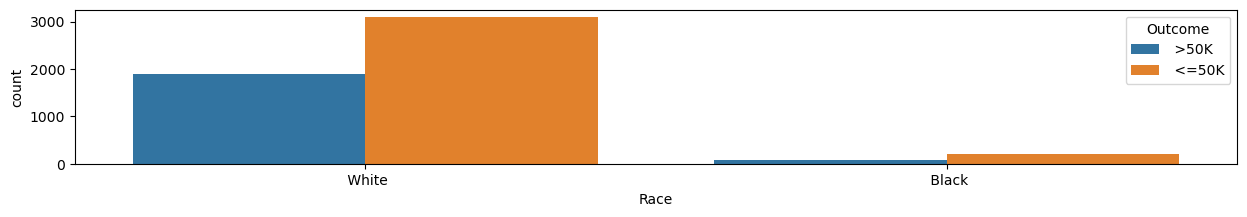

In [15]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'Race',hue='Outcome')
plt.show()

**Race looks like not an important variable to predict the outcome**

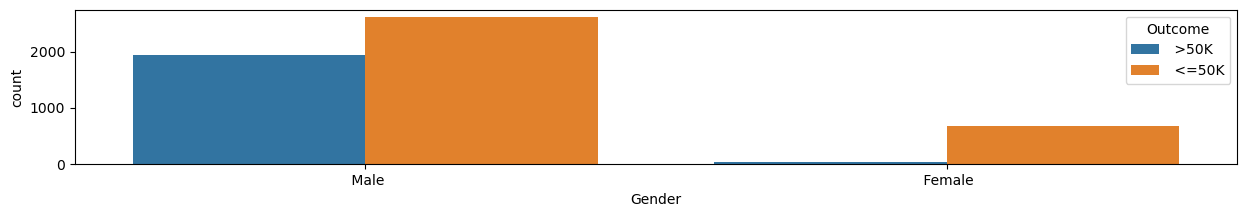

In [16]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'Gender',hue='Outcome')
plt.show()

**There are more number of female in the <=50K**

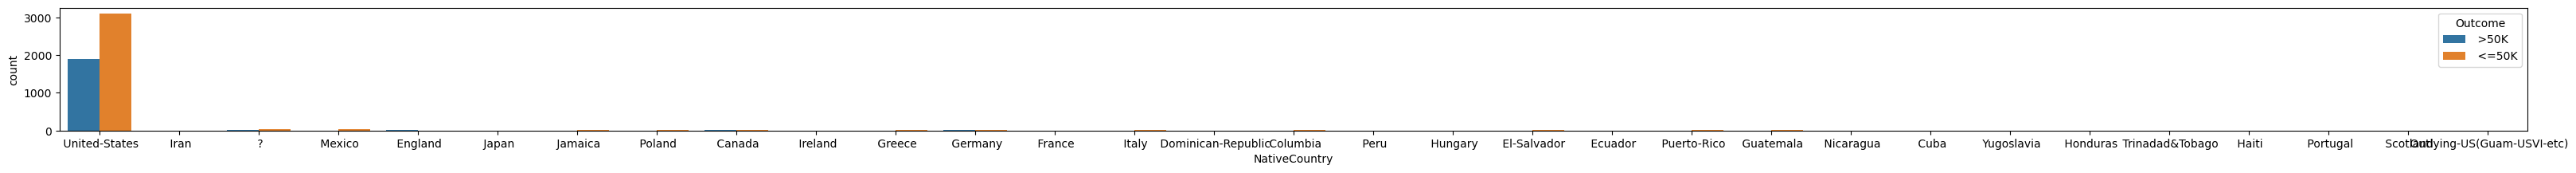

In [17]:
plt.figure(figsize=(40,2))
sns.countplot(data=dataset, x = 'NativeCountry',hue='Outcome')
plt.show()

**Native country looks like not an important variable to predict the outcome**

<a id="null"></a>
# 2.3. Missing Value Treatment

In [18]:
#Checking the count of the missing values percentage, there are very few missing values there in the dataset
dataset.isnull().sum()/len(dataset)*100

Age              0.0
Fnlwgt           0.0
Education        0.0
Education_Num    0.0
MaritalStatus    0.0
Occupation       0.0
Relationship     0.0
Race             0.0
Gender           0.0
Capital_Gain     0.0
Capital_Loss     0.0
HoursPerWeek     0.0
NativeCountry    0.0
Outcome          0.0
dtype: float64

In [17]:
#Missing Value Imputation - We can impute the missing values using the methods of mean, median and mode based on the various scenarios
#When there is a numerical field we can populate the missing values using mean or median, 
#if there are outliers in the dataset we use to populate the missing values using median else mean
#When we want to populate the missing values in the categorial files we go with mode as an option

<a id="enc"></a>
# 2.4. Encoding and Feature Scaling

In [19]:
# Separating the numerical and categorical columns
from sklearn.preprocessing import StandardScaler
def data_type(dataset):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(dataset)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    """
    Generates a list of binary columns in a dataframe.
    """
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(dataset)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(dataset, categorical):
    """
    Function to automate the process of encoding the categorical data
    :param dataset: Dataframe
    :param categorical: List of categorical columns
    :return: Dataframe
    """
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes
    return dataset

dataset = encoding(dataset, categorical)

def feature_scaling(dataset, numerical):
    """
    Function to automate the process of feature scaling the numerical data
    :param dataset: Dataframe
    :param numerical: List of numerical columns
    :return: Dataframe
    """
    sc_x = StandardScaler()
    dataset[numerical] = sc_x.fit_transform(dataset[numerical])
    return dataset

dataset = feature_scaling(dataset, numerical)

In [20]:
dataset

,Age,Fnlwgt,Education,Education_Num,MaritalStatus,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,HoursPerWeek,NativeCountry,Outcome
0,0.296270,-0.309559,0,1.599628,0,2,0,1,1,0.563578,-0.246166,-0.412544,29,1
1,-0.142020,0.824668,2,-0.216632,0,2,0,0,1,-0.168245,-0.246166,4.119378,29,1
2,0.909876,0.008332,1,-0.822052,0,1,0,1,1,-0.168245,-0.246166,-0.412544,29,0
3,0.208612,-0.422752,1,-0.822052,0,0,0,1,1,-0.168245,-0.246166,0.493840,29,0
4,-0.229678,-0.346225,1,-0.822052,0,1,0,1,1,-0.168245,-0.246166,-0.412544,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,0.208612,-0.297037,2,-0.216632,0,2,0,1,1,-0.168245,-0.246166,1.853417,29,1
5264,-0.843284,1.335953,1,-0.822052,0,1,0,1,1,-0.168245,-0.246166,0.493840,29,0
5265,1.085192,-1.028710,1,-0.822052,0,1,0,1,1,-0.168245,-0.246166,-0.412544,29,0
5266,0.822218,0.872524,1,-0.822052,0,0,0,1,1,-0.168245,-0.246166,-0.412544,29,0


<a id="lr"></a>
# 3. What is Decision Tree

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

It is more like a if and else condition where we can decide the the outcome.

<a id="gi"></a>
# 3.1. Understanding the concept of Entropy and Gini

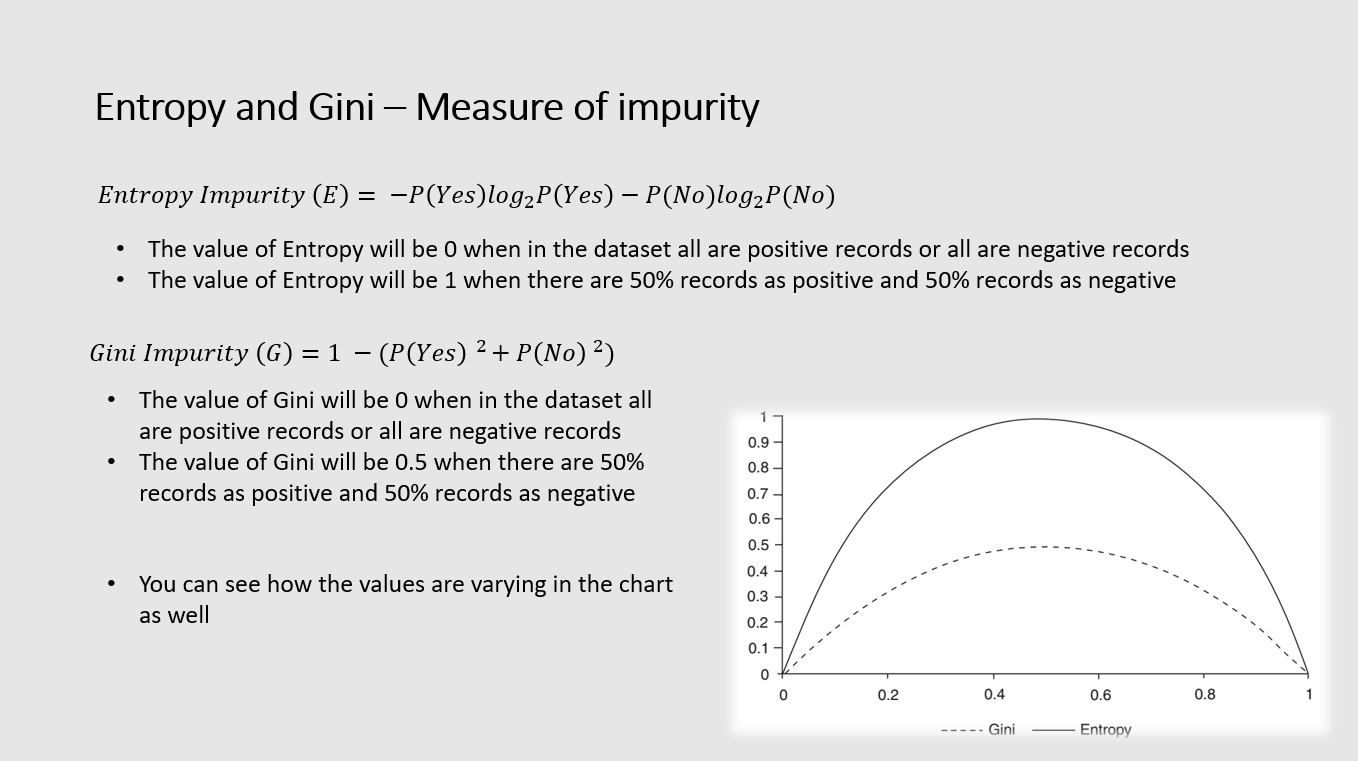

<a id="mf"></a>
# 3.2. How to calculate the information gain

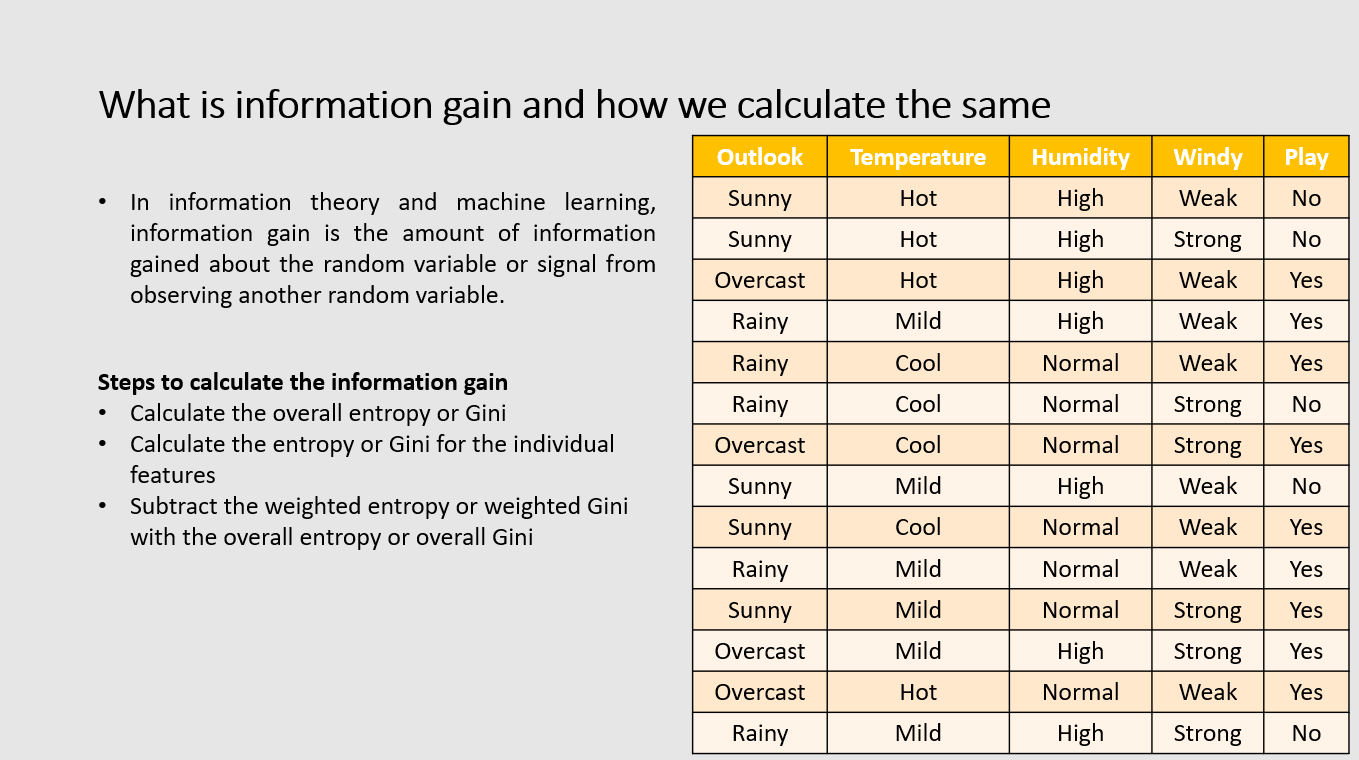

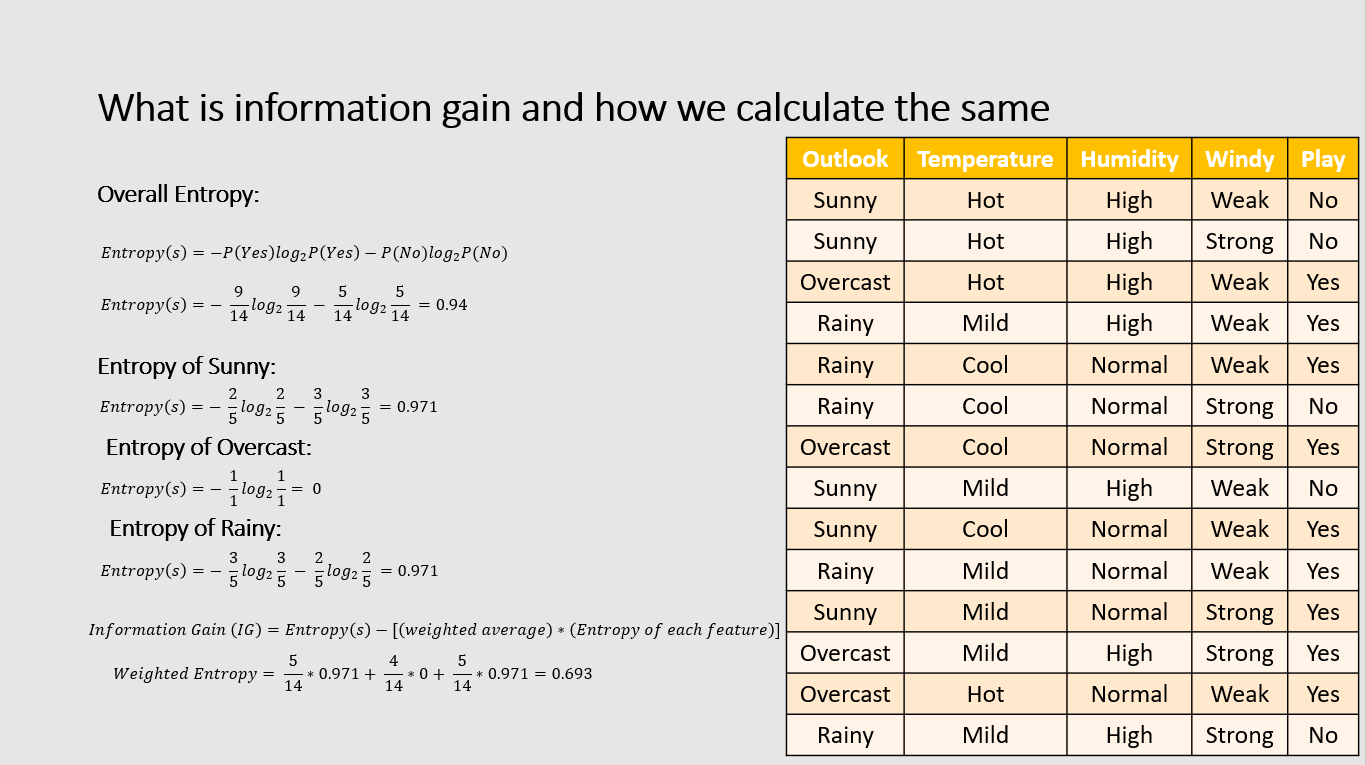

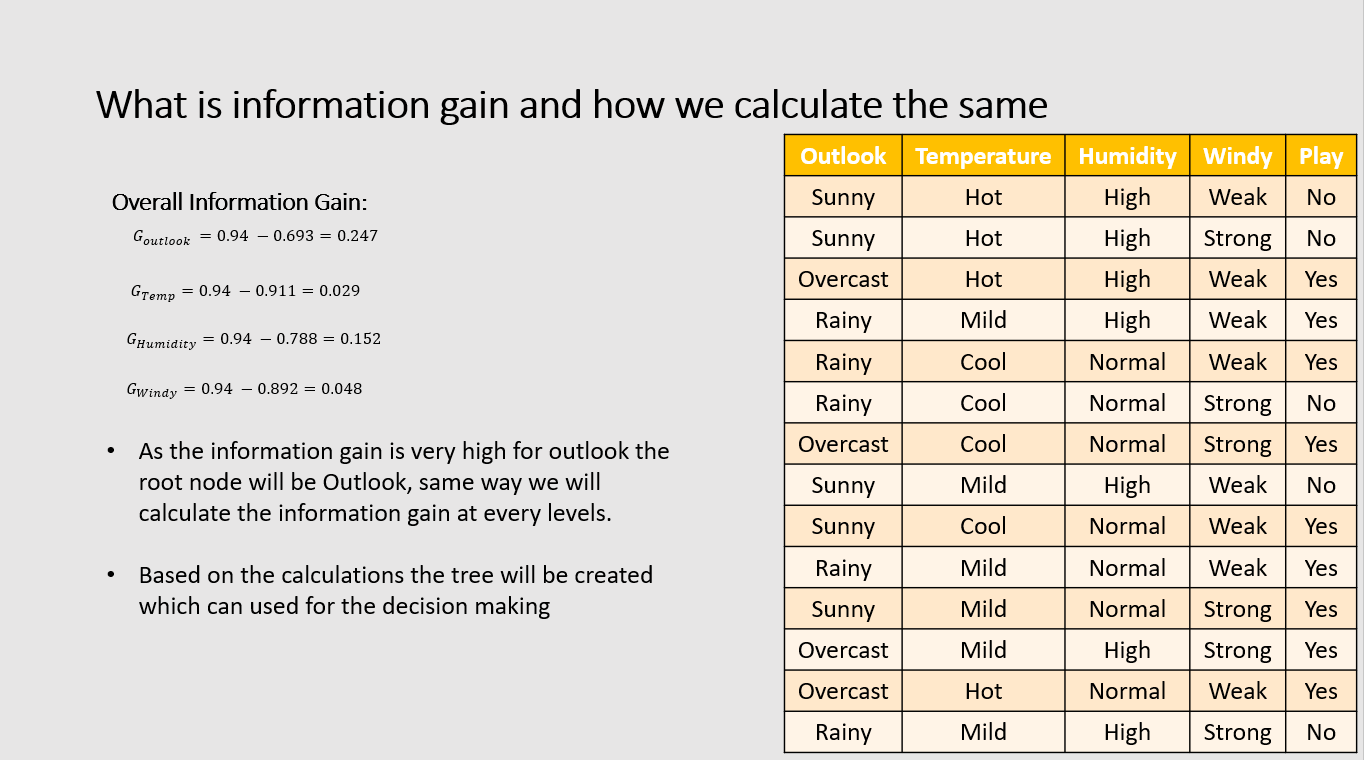

<a id="sf"></a>
# 3.3. How the tree gets build with an example

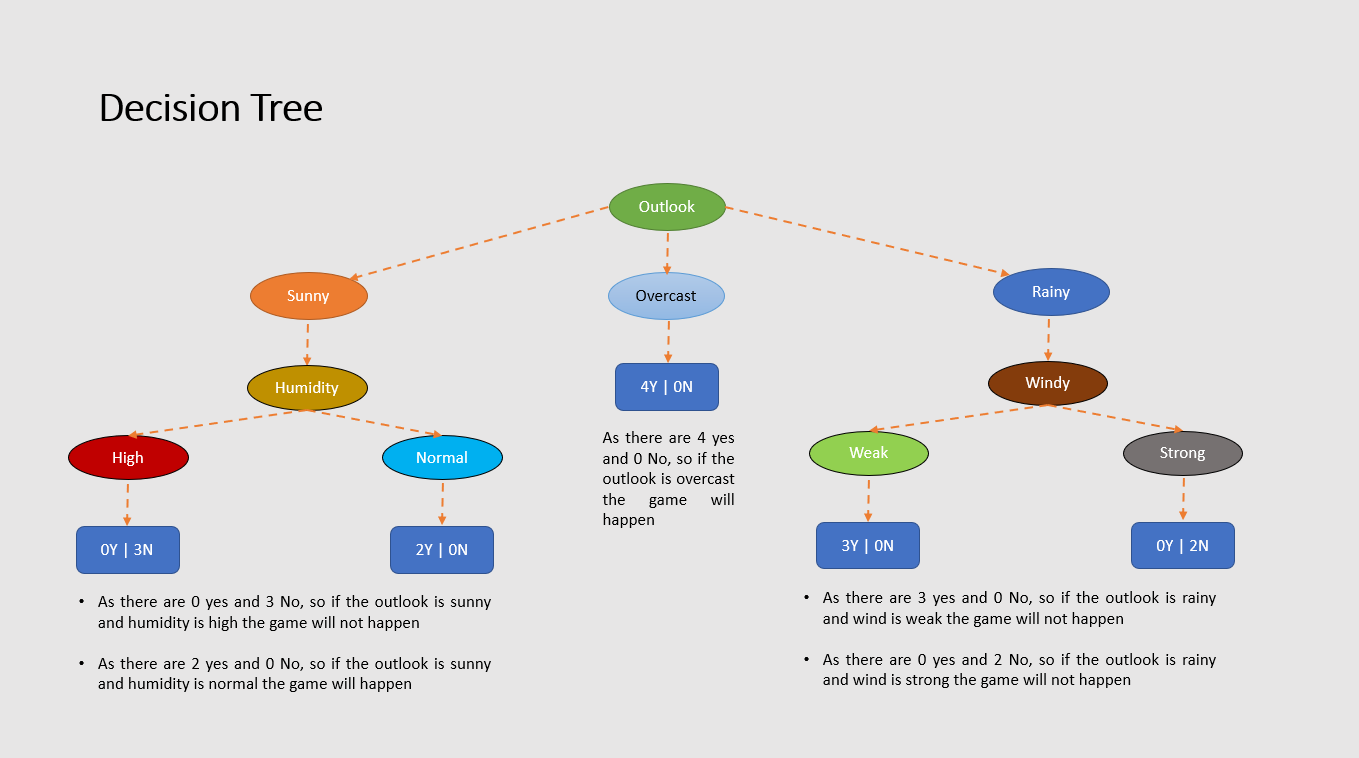

<a id="sf"></a>
# 3.4. How the depth of the tree will impact the model (Overfitting and Underfitting)

When the depth of the tree is more the model is tending to overfit and when the depth of the tree is less the model is tending to underfit, to find the best value of the depth we will use the concept of K-fold cross validation technique.

<a id="sd"></a>
# 4. Splitting the data into Train and Test

In [21]:
#Splitting all the independent variables in one array
x = dataset.iloc[:,0:13].values

In [22]:
#Splitting the dependent variable in one array
y = dataset.iloc[:,-1].values

In [23]:
#Splitting the dataset into train and test based on the 70-30 ratio
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

<a id="model"></a>
# 5. Creating the model on training dataset

In [24]:
#Applying the Decision Tree on the training dataset
from sklearn.tree import DecisionTreeClassifier
dtmodel_ini = DecisionTreeClassifier()
dtmodel_ini.fit(x_train,y_train)

DecisionTreeClassifier()

<a id="test"></a>
# 6. Run the model on the Test Dataset

In [25]:
#Running the model on the test dataset
y_pred_ini = dtmodel_ini.predict(x_test)

<a id="acc"></a>
# 7. Check the accuracy of the model

There are various ways to check the accuracy of the classification model we are going to use all the ways to check the accuracies 

In [26]:
#Importing all the functions to for checking the accuracies
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve, accuracy_score, log_loss

<a id="accscore"></a>
# 7.1. Accuracy Score

In [27]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_ini)

0.7071473750790639

<a id="cm"></a>
# 7.2. Confusion Matrix

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


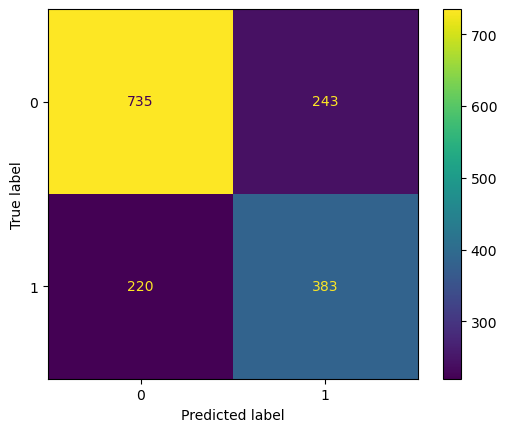

In [28]:
#Using confusion matrix we are checking the accuracy on the testing dataset
plot_confusion_matrix(dtmodel_ini,x_test,y_test)

<a id="roc"></a>
# 7.3. RO Curve

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


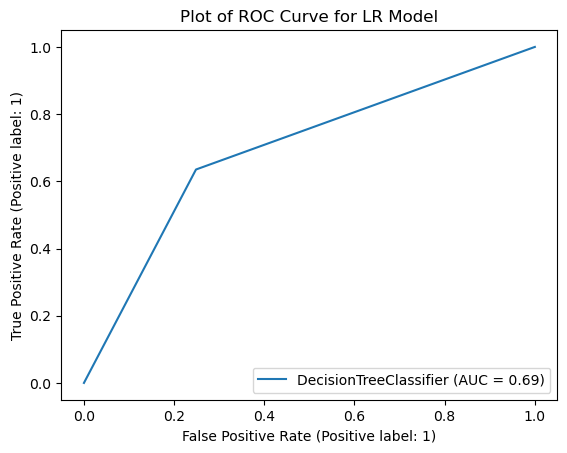

In [29]:
#Using ROC Curve we are checking the accuracy on the testing dataset
plot_roc_curve(dtmodel_ini, x_test, y_test)
plt.title("Plot of ROC Curve for LR Model")
plt.show()

<a id="f1score"></a>
# 7.4. F1 Score

In [30]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Negative(0)","Positive(1)"]
# Classification Report
print(classification_report(y_test,dtmodel_ini.predict(x_test),target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.77      0.75      0.76       978
 Positive(1)       0.61      0.64      0.62       603

    accuracy                           0.71      1581
   macro avg       0.69      0.69      0.69      1581
weighted avg       0.71      0.71      0.71      1581



<a id="logloss"></a>
# 7.5. Log Loss

In [31]:
#Using Logloss we are checking the accuracy on the testing dataset
log_loss(y_test,dtmodel_ini.predict(x_test))

10.114894227083608

<a id="overunder"></a>
# 8. Comparing the Training and Testing Accuracies

In [32]:
#Storing the predicted values of training dataset in y_pred_train
y_pred_train = dtmodel_ini.predict(x_train)

In [33]:
#Checking the accuracy of training dataset 
accuracy_score(y_train,y_pred_train)

1.0

In [34]:
#Checking the accuracy of testing dataset
accuracy_score(y_test,y_pred_ini)

0.7071473750790639

**Conclusion:** As there is very less difference between the accuracy of training and testing dataset we are good to go with the model

<a id="kfcv"></a>
# 9. Applying Grid Search Cross Validation to find the best value of depth

In [35]:
#Using Grid Search cross validation technique we will find the best value of hyper parameters - 
#Here we are finding the best kernel
from sklearn.model_selection import GridSearchCV
parameters = [ {'max_depth': [1,2,3,4,5,6,7,8,9,10], 'min_samples_split':[10,20,30,40,50,60]}]
grid_search = GridSearchCV(estimator = dtmodel_ini,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [36]:
best_parameters

{'max_depth': 7, 'min_samples_split': 50}

**We are going with the default criteria of Gini as we prefer to go for it as Entropy consists of log which can be computationaly more exhaustive.**

In [37]:
#Applying the Decision Tree on the training dataset
from sklearn.tree import DecisionTreeClassifier
dtmodel_tuned_pruned = DecisionTreeClassifier(max_depth=7,min_samples_split=50)
dtmodel_tuned_pruned.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=50)

In [38]:
#Running the model on the test dataset
y_pred_tuned_pruned = dtmodel_tuned_pruned.predict(x_test)

In [39]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_tuned_pruned)

0.7678684376976597

In [40]:
#Running the model on the test dataset
y_pred = dtmodel_tuned_pruned.predict(x_train)

In [41]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_train,y_pred)

0.7984811499864388

In [42]:
# Create Decision Tree Plot
from IPython.display import Image
from sklearn import tree
import pydotplus

In [43]:
feature_names = dataset.iloc[:,0:13]

In [44]:
feature_names = feature_names.columns

In [45]:
feature_names

Index(['Age', 'Fnlwgt', 'Education', 'Education_Num', 'MaritalStatus',
       'Occupation', 'Relationship', 'Race', 'Gender', 'Capital_Gain',
       'Capital_Loss', 'HoursPerWeek', 'NativeCountry'],
      dtype='object')

In [46]:
# Create A Dot Plot
dot_data = tree.export_graphviz(dtmodel_tuned_pruned,out_file=None,feature_names=feature_names,class_names=target_names)

In [47]:
# Draw a graph
graph = pydotplus.graph_from_dot_data(dot_data)

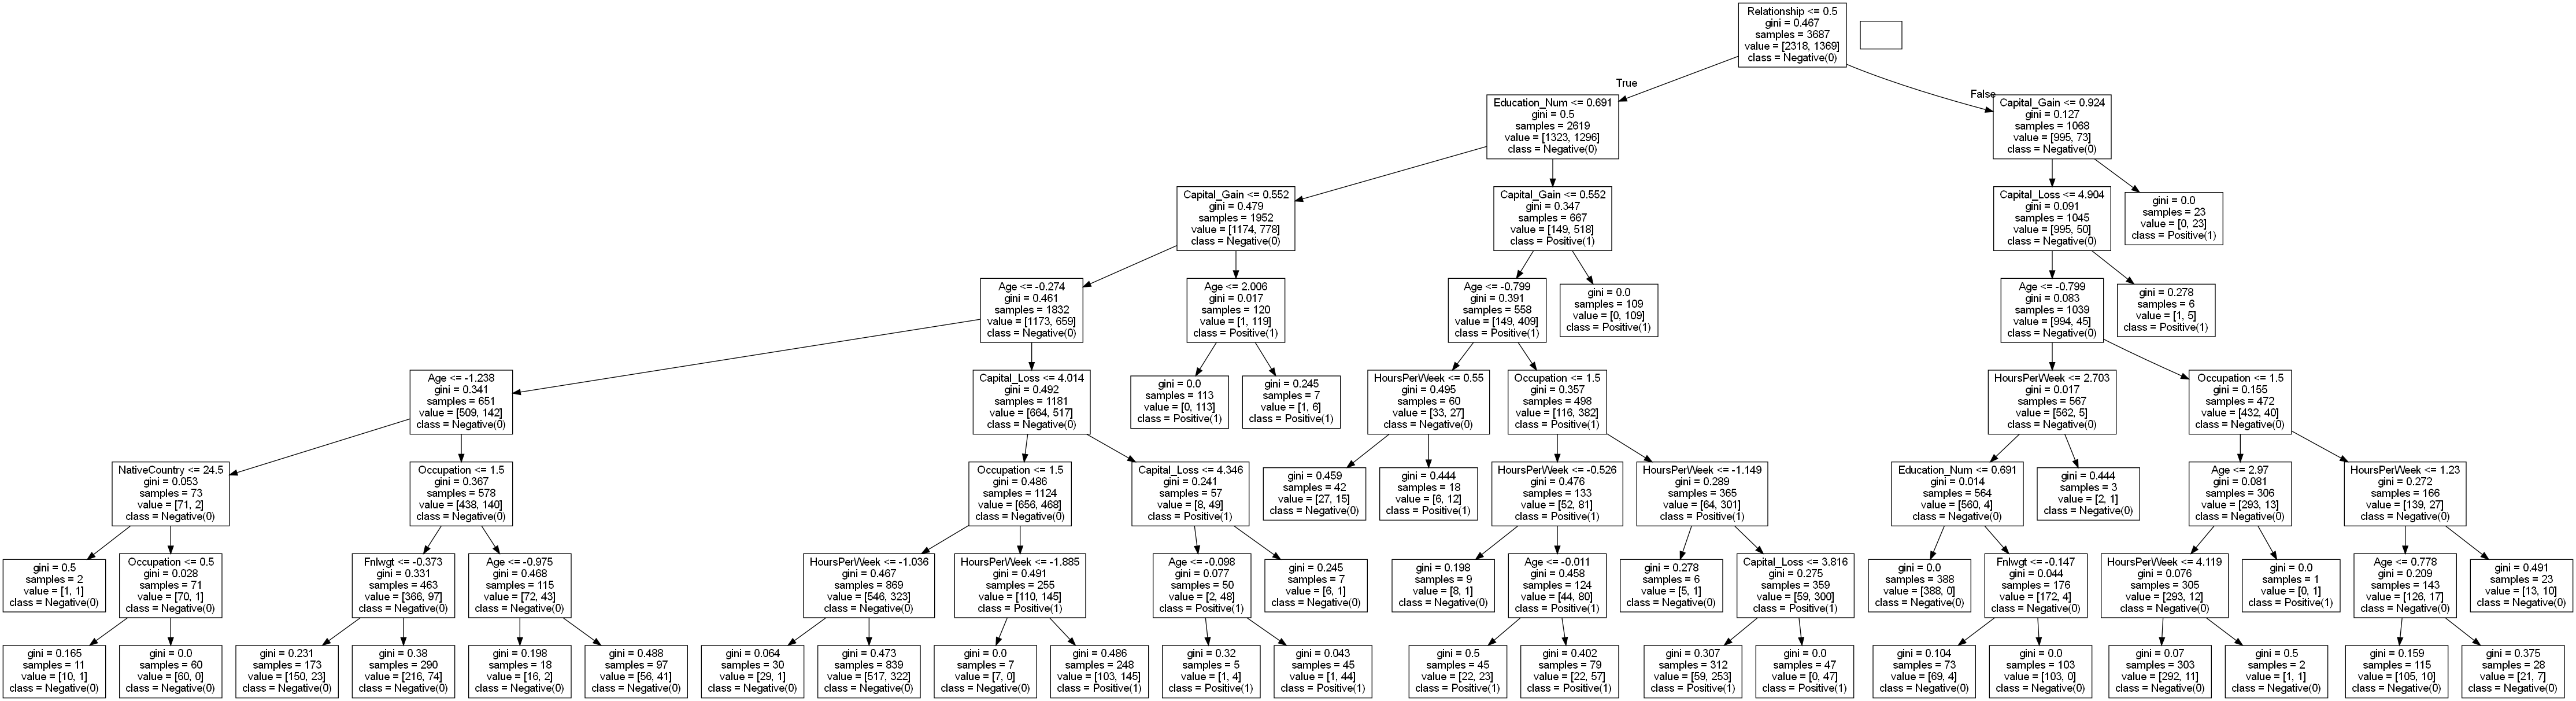

In [48]:
Image(graph.create_png())

**Some of the important variables are: Relationship, Education, Occupation, Capital Gain for the prediction of the dependent variable**

In [49]:
# create an empty dataframe to store the scores for various algorithms
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_auc_score, f1_score
score_card = pd.DataFrame(columns=['model_name','Accuracy Score','Precision Score','Recall Score','AUC Score','f1 Score'])

# append the result table for all performance scores

def update_score_card(y_test,y_pred,model_name):

    # assign 'score_card' as global variable
    global score_card
    
    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'model_name':model_name,
                                    'Accuracy Score' : accuracy_score(y_test, y_pred),
                                    'Precision Score': precision_score(y_test, y_pred),
                                    'Recall Score': recall_score(y_test, y_pred),
                                    'AUC Score': roc_auc_score(y_test, y_pred),
                                    'f1 Score': f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [50]:
update_score_card(y_test,y_pred_ini,'initial_model')

C:\Users\rahul\AppData\Local\Temp\ipykernel_38860\1828073584.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'model_name':model_name,


In [51]:
update_score_card(y_test,y_pred_tuned_pruned,'pruned_model')

C:\Users\rahul\AppData\Local\Temp\ipykernel_38860\1828073584.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'model_name':model_name,


In [52]:
score_card

,model_name,Accuracy Score,Precision Score,Recall Score,AUC Score,f1 Score
0,initial_model,0.707147,0.611821,0.635158,0.693346,0.623271
1,pruned_model,0.767868,0.756522,0.577114,0.731298,0.654751


**After doing the pruning the model looks good with a better predictions**